# Vaccine Introduction Dataset EDA 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset 

In [2]:
df = pd.read_csv("../data/processed/vaccine_intro_cleaned.csv")

## Basic Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138321 entries, 0 to 138320
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   iso_3_code   138321 non-null  object
 1   countryname  138321 non-null  object
 2   who_region   138321 non-null  object
 3   year         138321 non-null  int64 
 4   description  138321 non-null  object
 5   intro        138321 non-null  object
 6   intro_flag   138321 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 7.4+ MB


In [6]:
df.head()

,iso_3_code,countryname,who_region,year,description,intro,intro_flag
0,AFG,Afghanistan,EMRO,2023,aP (acellular pertussis) vaccine,No,0
1,AFG,Afghanistan,EMRO,2023,Hepatitis A vaccine,No,0
2,AFG,Afghanistan,EMRO,2023,Hepatitis B vaccine,Yes,1
3,AFG,Afghanistan,EMRO,2023,HepB birth dose,Yes,1
4,AFG,Afghanistan,EMRO,2023,Hib (Haemophilus influenzae type B) vaccine,Yes,1


In [7]:
df.isnull().sum()

iso_3_code     0
countryname    0
who_region     0
year           0
description    0
intro          0
intro_flag     0
dtype: int64

## Sumamry Statistics

In [8]:
df.describe(include='all')

,iso_3_code,countryname,who_region,year,description,intro,intro_flag
count,138321,138321,138321,138321.000000,138321,138321,138321.000000
unique,195,195,7,NaN,22,3,NaN
top,AFG,Afghanistan,EURO,NaN,Seasonal Influenza vaccine,No,NaN
freq,747,747,34523,NaN,14715,97695,NaN
mean,NaN,NaN,NaN,2001.253411,NaN,NaN,0.273595
std,NaN,NaN,NaN,18.480199,NaN,NaN,0.445805
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1992.000000,NaN,NaN,0.000000
50%,NaN,NaN,NaN,2006.000000,NaN,NaN,0.000000
75%,NaN,NaN,NaN,2015.000000,NaN,NaN,1.000000


## Count of Vaccine Introductions per year

In [9]:
intro_by_year = df.groupby("year")['intro_flag'].sum().reset_index()

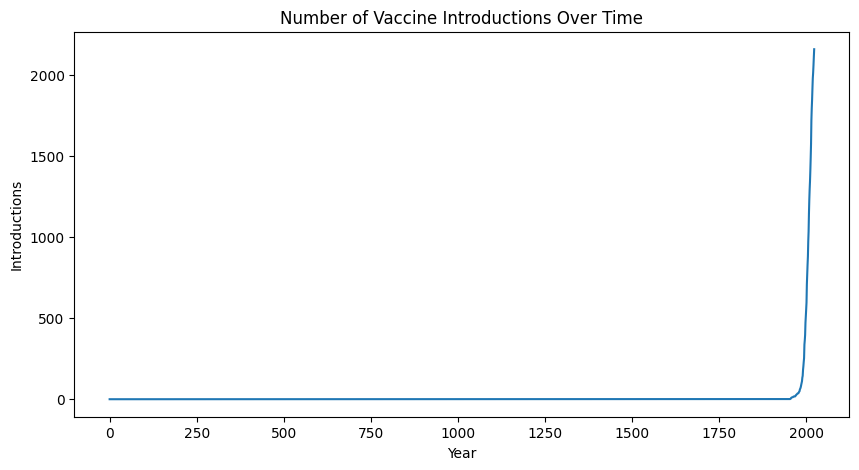

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(data = intro_by_year, x = 'year', y = 'intro_flag', markers = 'o')
plt.title("Number of Vaccine Introductions Over Time")
plt.xlabel("Year")
plt.ylabel("Introductions")
plt.savefig("../output/Vaccine_Intro/Number of Vaccine Introductions Over Time.png")
plt.show()

## Top Vaccine by number of countries introduced

In [12]:
top_vaccines = df.groupby("description")['intro_flag'].sum().sort_values(ascending=False).head(10)

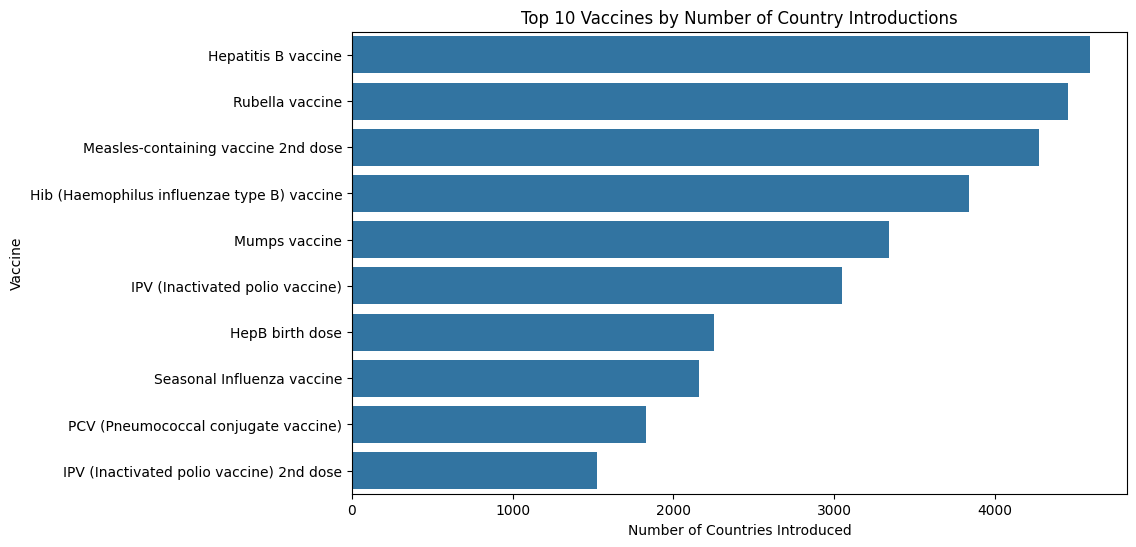

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x = top_vaccines.values, y = top_vaccines.index)
plt.title("Top 10 Vaccines by Number of Country Introductions")
plt.xlabel("Number of Countries Introduced")
plt.ylabel("Vaccine")
plt.savefig("../output/Vaccine_Intro/Top 10 Vaccines by Number of Country Introductions.png")
plt.show()

## Countries with most vaccine introductions

In [24]:
country_intro = df.groupby("countryname")['intro_flag'].sum().sort_values(ascending=False).head(10)

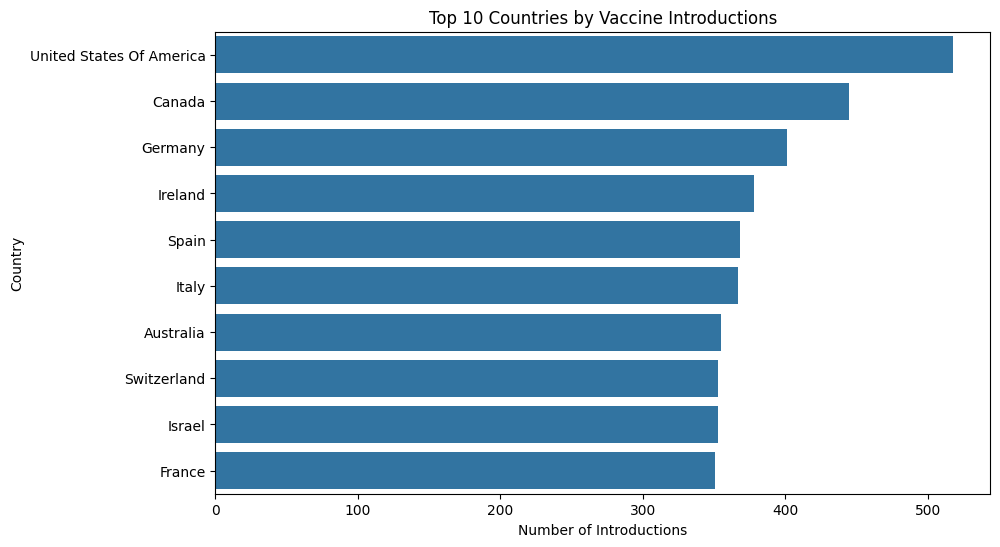

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x=country_intro.values, y=country_intro.index)
plt.title("Top 10 Countries by Vaccine Introductions")
plt.xlabel("Number of Introductions")
plt.ylabel("Country")
plt.savefig("../output/Vaccine_Intro/Top 10 Countries by Vaccine Introductions.png")
plt.show()

## Yearly introduction trend for selected vaccines

In [26]:
selected_vaccines = ['Hepatitis B vsccine','Rubella vaccine', 'Measles-containing vaccine 2nd dose', 'Hib (Haemophilus influenza type B) vaccine', 'Mumps vaccine', 'IPV(Inactivated polio vaccine)', 'HepB birth dose', 'Seasonal Influenza vaccine', 'PCV (Pneumococcal conjugate vaccine)', 'IPV (Inactivated polio vaccine) 2nd close']

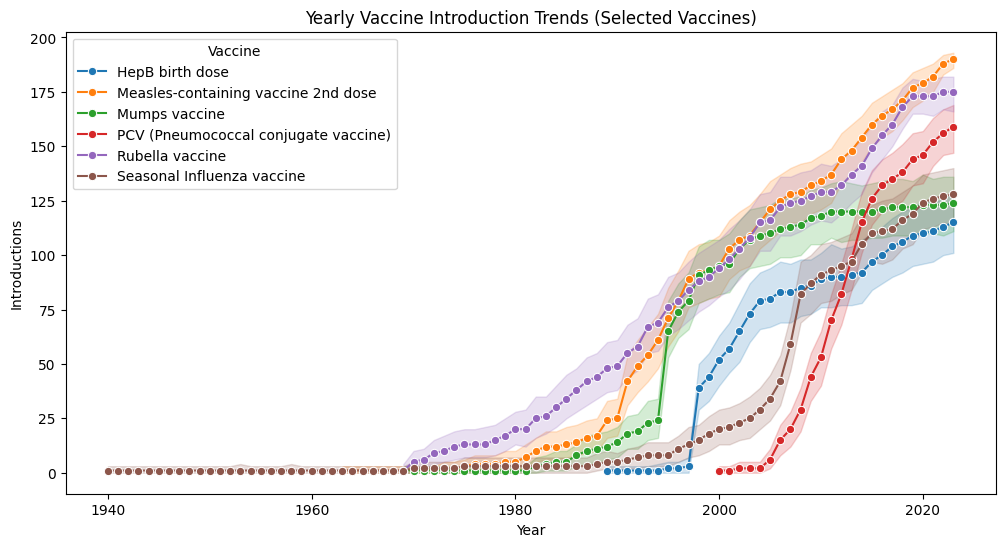

In [28]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df[df['description'].isin(selected_vaccines)],
             x="year", y="intro_flag", hue="description", marker="o", estimator="sum")
plt.title("Yearly Vaccine Introduction Trends (Selected Vaccines)")
plt.xlabel("Year")
plt.ylabel("Introductions")
plt.legend(title="Vaccine")
plt.savefig("../output/Vaccine_Intro/Yearly Vaccine Introduction Trends (Selected Vaccines).png")
plt.show()

## Heatmap of Vaccine vs Year (adoption timeline)

In [30]:
pivot  = df.pivot_table(index = 'description', columns = 'year', values = 'intro_flag', aggfunc = "sum").fillna(0)

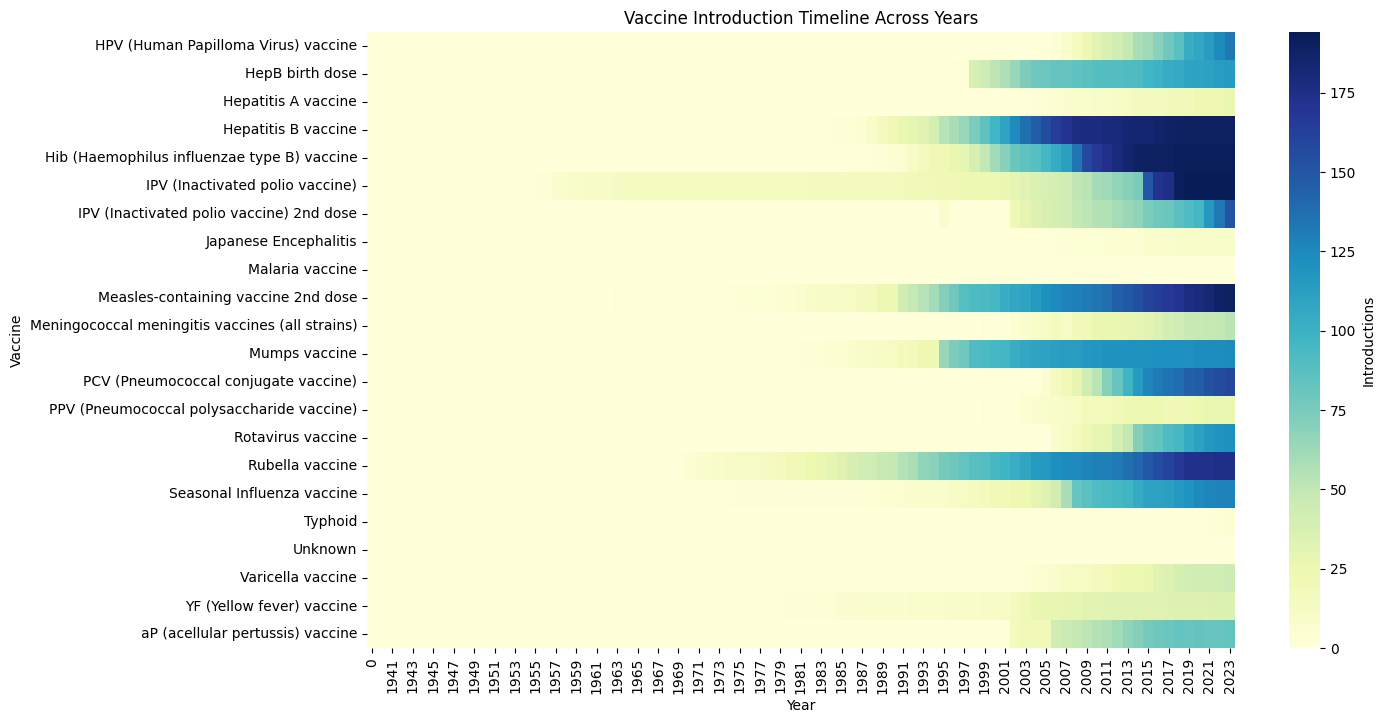

In [31]:
plt.figure(figsize=(14,8))
sns.heatmap(pivot, cmap="YlGnBu", cbar_kws={'label': 'Introductions'})
plt.title("Vaccine Introduction Timeline Across Years")
plt.xlabel("Year")
plt.ylabel("Vaccine")
plt.savefig("../output/Vaccine_Intro/Vaccine Introduction Timeline Across Years")
plt.show()